<a href="https://colab.research.google.com/github/giginar/Machinelearning/blob/main/Project_data_vis_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

###Data information and Load

amount_tsh – Total static head (amount water available to waterpoint)

date_recorded – The date the row was entered

funder – Who funded the well

gps_height – Altitude of the well

installer – Organization that installed the well

longitude – GPS coordinate

latitude – GPS coordinate

wpt_name – Name of the waterpoint if there is one

num_private -No description

basin – Geographic water basin

subvillage – Geographic location

region – Geographic location

region_code – Geographic location (coded)

district_code – Geographic location (coded)

lga – Geographic location

ward – Geographic location

population – Population around the well

public_meeting – True/False

recorded_by – Group entering this row of data

scheme_management – Who operates the water point

scheme_name – Who operates the water point

permit – If the water point is permitted

construction_year – Year the water point was constructed

extraction_type – The kind of extraction the water point uses

extraction_type_group – The kind of extraction the water point uses

extraction_type_class – The kind of extraction the water point uses

management – How the water point is managed

management_group – How the water point is managed

payment – What the water costs

payment_type – What the water costs

water_quality – The quality of the water

quality_group – The quality of the water

quantity – The quantity of water

quantity_group – The quantity of water

source – The source of the water

source_type – The source of the water

source_class – The source of the water

waterpoint_type – The kind of waterpoint

waterpoint_type_group – The kind of waterpoint

In [ ]:
df_labels = pd.read_csv("/content/drive/MyDrive/Dersler/8_IT541_Machine_Learning/project/training_set_labels.csv")
df_values = pd.read_csv("/content/drive/MyDrive/Dersler/8_IT541_Machine_Learning/project/training_set_values.csv")
df = pd.merge(df_values, df_labels, on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
#cheking if there are null values.
df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
#funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit have some null values.

###gps_height, longitude, latitude, region_code, district_code

In [ ]:
print(df.gps_height.value_counts())
#2428 different values, will include this feature to the model.

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64


In [ ]:
print(df.longitude.value_counts())

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64


In [ ]:
print(df.latitude.value_counts())

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64


In [ ]:
print(df.region_code.value_counts())

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64


In [ ]:
print(df.district_code.value_counts())

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64


In [ ]:
#longitude and latitude these geographical values will not be effective on the model.
#num_private is the same.
#but region_code and district_code looks like different from each other so i will keep them.
df = df.drop(['longitude', 'latitude','num_private'], axis=1)


In [ ]:
#wpt_name is name of the waterpoint, it wont be effective, so i will drop it.
df = df.drop(['wpt_name'], axis=1)

###ward, lga and region

In [ ]:
print(df.region.value_counts())

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64


In [ ]:
print(df.lga.value_counts())

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64


In [ ]:
print(df.ward.value_counts())

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Mwanga Kaskazini      1
Sungwisi              1
Igogo                 1
Mawenzi               1
Kirongo               1
Name: ward, Length: 2092, dtype: int64


In [ ]:
#region, lga and ward is string values and all are related referring to the same thing, 
#georaphical location of the wells. They maybe correlated with each other. We will drop one of them.
df = df.drop([ 'ward'], axis=1)

###Recorded_by

In [ ]:
df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [ ]:
#all the recorded by the same company, must be dropped.
df = df.drop('recorded_by', axis=1)

###extraction_type, extraction_type_group and extraction_type_class

In [ ]:
# extraction_type, extraction_type_group and extraction_type_class are the same data.
# Two of them must be dropped.
print(df.groupby(['extraction_type_group', 'extraction_type','extraction_type_class']).size())

extraction_type_group  extraction_type            extraction_type_class
afridev                afridev                    handpump                  1770
gravity                gravity                    gravity                  26780
india mark ii          india mark ii              handpump                  2400
india mark iii         india mark iii             handpump                    98
mono                   mono                       motorpump                 2865
nira/tanira            nira/tanira                handpump                  8154
other                  other                      other                     6430
other handpump         other - mkulima/shinyanga  handpump                     2
                       other - play pump          handpump                    85
                       other - swn 81             handpump                   229
                       walimi                     handpump                    48
other motorpump        cemo          

In [ ]:
df = df.drop(['extraction_type', 'extraction_type_group'], axis=1)

###management, management_group and scheme_management

In [ ]:
#management, management_group and scheme_management can be same.
df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [ ]:
#looks like same thing i will drop two.
#not exactly understand what iis management_group's user-group but most of the values have this value,
#i will drop that one.

In [ ]:
df = df.drop(['management_group','management'], axis=1)

###Payment - Payment Value

In [ ]:
#payment and payment_value can also be same or similar.
print(df.groupby(['payment','payment_type']).size())

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64


In [ ]:
#payment and payment_value, they are exact match, one will drop.
df = df.drop('payment', axis=1)

###water_quality and quality_group

In [ ]:
#water_quality and quality_group can also be same or similar.
print(df.groupby(['water_quality','quality_group']).size())

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64


In [ ]:
#water_quality and quality_group, they are representing the same thing, one will drop.
df = df.drop('quality_group', axis=1)

###quantity and quantity_group

In [ ]:
#quantity and quantity_group can also be same or similar.
print(df.groupby(['quantity','quantity_group']).size())

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64


In [ ]:
#quantity and quantity_group, they are exact match, one will drop.
df = df.drop('quantity_group', axis=1)

###Source, source_type and source_class

In [ ]:
#Source, source_type and source_class can be the same.

In [ ]:
print(df.groupby(['source','source_type','source_class']).size())

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64


In [ ]:
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [ ]:
df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [ ]:
#Source_class is different then others, it will stay.
#source and source_type are the same thing, so one will drop.
df = df.drop('source', axis=1)

###Waterpoint_type and waterpoint_type_group

In [ ]:
print(df.groupby(['waterpoint_type','waterpoint_type_group']).size())
#waterpoint_type and waterpoint_type_group are representing the same thing. one should drop.

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64


In [ ]:
df = df.drop('waterpoint_type_group', axis=1)

###Rest of the null values and others

In [ ]:
df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
population                   0
public_meeting            3334
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type_class        0
payment_type                 0
water_quality                0
quantity                     0
source_type                  0
source_class                 0
waterpoint_type              0
status_group                 0
dtype: int64

In [ ]:
#funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit have some null values,
#we have to deal with them.

In [ ]:
#sns.countplot(x='subvillage',data=df) that's not working.
print(df.subvillage.value_counts())

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Isageng'E         1
Majego            1
Nyangae           1
Geer              1
Junjuhuiseke      1
Name: subvillage, Length: 19287, dtype: int64


In [ ]:
#Length: 19287, that much different village can not be effective on the model.
df = df.drop('subvillage', axis=1)

In [ ]:
df.groupby(['installer','funder','status_group']).size()

installer       funder                  status_group           
-               Government Of Tanzania  functional                   1
                                        non functional               1
                Kalebejo Parish         functional                   1
0               0                       functional                 445
                                        functional needs repair      3
                                                                  ... 
wizara ya maji  Serikali                functional                   2
world           World Bank              functional needs repair      1
                                        non functional               3
world banks     World Bank              non functional               1
world vision    World Vision            functional                   1
Length: 5188, dtype: int64

In [ ]:
#filling empty funder rows with "unknown"
df.funder = df.funder.fillna('unknown')
#installer and funder are representing same thing, looks like it.
#so should drop one.
df = df.drop('installer', axis=1)

In [ ]:
#Permit and public meeting
#can be dropped or filled with other.
#filling with other allows us to use our valuable data so we wont drop them.
df.permit = df.permit.fillna('other')
df.public_meeting  = df.public_meeting .fillna('other')

In [ ]:
df.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
population                   0
public_meeting               0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type_class        0
payment_type                 0
water_quality                0
quantity                     0
source_type                  0
source_class                 0
waterpoint_type              0
status_group                 0
dtype: int64

###scheme_management and scheme_name

In [ ]:
df.groupby(['scheme_management','scheme_name','status_group']).size()

scheme_management  scheme_name               status_group           
Company            BFFS                      non functional               1
                   Bagamoyo Wate             functional                  47
                                             non functional              13
                   Bagamoyo wate             functional                 150
                                             non functional              60
                                                                       ... 
Water authority    no scheme                 functional                   5
                                             functional needs repair      1
                                             non functional               3
                   pump                      non functional               2
                   water supply at Kalebejo  non functional               1
Length: 4630, dtype: int64

In [ ]:
df.scheme_name.value_counts()

K                           682
None                        644
Borehole                    546
Chalinze wate               405
M                           400
                           ... 
Namtibwili                    1
kisanga dam                   1
Upper River                   1
Mese line                     1
Nyakabila  spring source      1
Name: scheme_name, Length: 2696, dtype: int64

In [ ]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
#scheme_name – Who operates the water point, 2696 different values, so will drop that one, scheme_management looks like a more valuable data.
#scheme_management has too much empty variable, but will fill the empty ones with unknown also.
df = df.drop('scheme_name',axis=1)
df.scheme_management = df.scheme_management.fillna('unknown')

In [ ]:
#there are no null values.

###Construction_year is string

In [ ]:
#Construction_year is string value;
#will create a new column called "well_age" 
#well_age = construction_year - date_recorded
#that will create a logical data for me to use as the age of the well.

In [ ]:
df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [ ]:
df.isnull().sum()
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.date_recorded.head(5)
print(df.date_recorded.dt.year.head(5))
print(df.construction_year.head(5))
df['well_age'] = df.date_recorded.dt.year - df.construction_year
df = df.drop(['construction_year','date_recorded'], axis=1)
df.well_age.head(5)

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int64
0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64


0      12
1       3
2       4
3      27
4    2011
Name: well_age, dtype: int64

###Last modeifications and save

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   region_code            59400 non-null  int64  
 7   district_code          59400 non-null  int64  
 8   lga                    59400 non-null  object 
 9   population             59400 non-null  int64  
 10  public_meeting         59400 non-null  object 
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  object 
 13  extraction_type_class  59400 non-null  object 
 14  payment_type           59400 non-null  object 
 15  wa

In [ ]:
#in case there is random capitalization

df.funder = df.funder.str.lower()
df.basin = df.basin.str.lower()
df.extraction_type_class=df.extraction_type_class.str.lower()
df.scheme_management = df.scheme_management.str.lower()
df.water_quality = df.water_quality.str.lower()
df.quantity = df.quantity.str.lower()
df.source_type = df.source_type.str.lower()
df.source_class = df.source_class.str.lower()
df.waterpoint_type = df.waterpoint_type.str.lower()

In [ ]:
df.head()

,id,amount_tsh,funder,gps_height,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,extraction_type_class,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,well_age
0,69572,6000.0,roman,1390,lake nyasa,Iringa,11,5,Ludewa,109,True,vwc,False,gravity,annually,soft,enough,spring,groundwater,communal standpipe,functional,12
1,8776,0.0,grumeti,1399,lake victoria,Mara,20,2,Serengeti,280,other,other,True,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,3
2,34310,25.0,lottery club,686,pangani,Manyara,21,4,Simanjiro,250,True,vwc,True,gravity,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,4
3,67743,0.0,unicef,263,ruvuma / southern coast,Mtwara,90,63,Nanyumbu,58,True,vwc,True,submersible,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,27
4,19728,0.0,action in a,0,lake victoria,Kagera,18,1,Karagwe,0,True,unknown,True,gravity,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011


###Correlation check between the features

In [ ]:
#let's check the correleation between our non-string features.

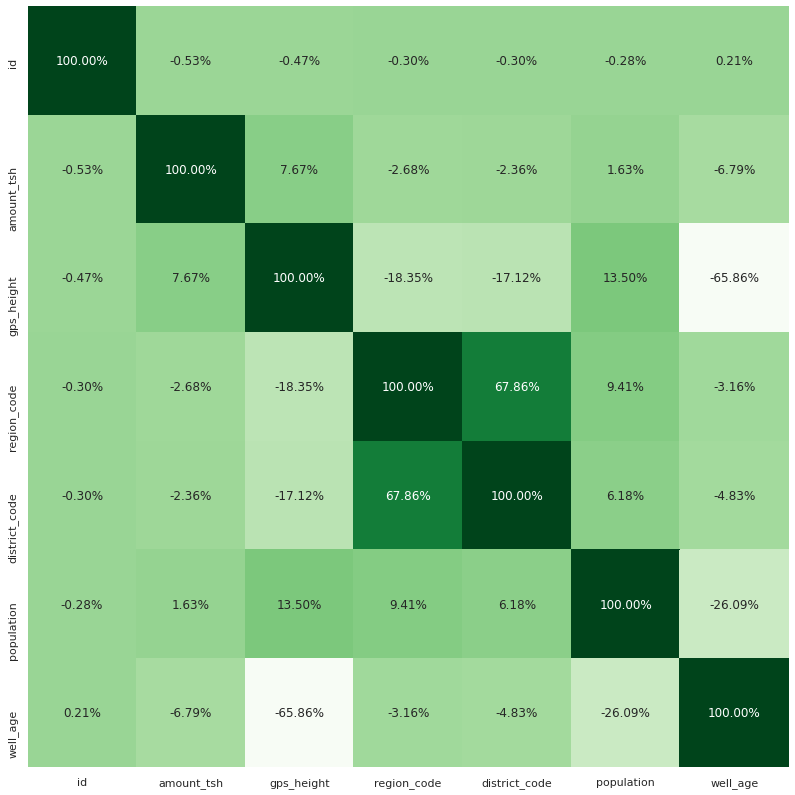

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

In [ ]:
#as expected there is linear,positive correlation between district_code and region_code
#its better to drop one.
df = df.drop('district_code',axis=1)

In [ ]:
df.to_csv('/content/drive/MyDrive/Dersler/8_IT541_Machine_Learning/project/train_data_for_models.csv', index=False)

###Same modifications should be also in the test data.

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Dersler/8_IT541_Machine_Learning/project/test_set_values.csv")

In [ ]:
df_test['date_recorded'] = pd.to_datetime(df_test['date_recorded'])
df_test.date_recorded.head(5)
print(df_test.date_recorded.dt.year.head(5))
print(df_test.construction_year.head(5))
df_test['well_age'] = df_test.date_recorded.dt.year - df_test.construction_year
df_test = df_test.drop(['construction_year','date_recorded'], axis=1)
df_test.well_age.head(5)

0    2013
1    2013
2    2013
3    2013
4    2013
Name: date_recorded, dtype: int64
0    2012
1    2000
2    2010
3    1987
4    2000
Name: construction_year, dtype: int64


0     1
1    13
2     3
3    26
4    13
Name: well_age, dtype: int64

In [ ]:
df_test.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'well_age'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   region_code            59400 non-null  int64  
 7   lga                    59400 non-null  object 
 8   population             59400 non-null  int64  
 9   public_meeting         59400 non-null  object 
 10  scheme_management      59400 non-null  object 
 11  permit                 59400 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  payment_type           59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

In [ ]:
df_test = df_test.drop(['longitude', 'latitude','district_code',
                        'wpt_name', 'num_private', 'subvillage', 'ward','recorded_by',
                        'extraction_type', 'extraction_type_group','scheme_name',
                        'management_group','management','payment','quality_group', 'quantity_group',
                        'source','waterpoint_type_group','installer'], axis=1)

In [ ]:
df_test.scheme_management = df_test.scheme_management.fillna('unknown')
df_test.funder = df_test.funder.fillna('unknown')
df_test.public_meeting  = df_test.public_meeting .fillna('other')
df_test.permit = df_test.permit.fillna('other')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 14850 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   basin                  14850 non-null  object 
 5   region                 14850 non-null  object 
 6   region_code            14850 non-null  int64  
 7   lga                    14850 non-null  object 
 8   population             14850 non-null  int64  
 9   public_meeting         14850 non-null  object 
 10  scheme_management      14850 non-null  object 
 11  permit                 14850 non-null  object 
 12  extraction_type_class  14850 non-null  object 
 13  payment_type           14850 non-null  object 
 14  water_quality          14850 non-null  object 
 15  qu

In [ ]:
df_test.to_csv('/content/drive/MyDrive/Dersler/8_IT541_Machine_Learning/project/test_data_for_models.csv', index=False)